<a href="https://colab.research.google.com/github/patricio200/IA2025/blob/main/Assignment_6_Patricio_Ramirez_Garc%C3%ADa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---


Universidad Autonoma de Nuevo León - Facultad de Ingenieria Mecanica y Electrica
> Inteligencia Artifial | Ene - Jun 2025

Professor:

> Daniel Isaías López Páez

Students:

> 2077950 Patricio Ramirez García

**Assignment 6: Convutional Neural Network**

---



**Objective**.- To train a Convolutional Neural Network (CNN) model.



**Instructions**.-

The student will implement and train a Convolutional Neural Network (CNN) using the Python programming language in Google Colab. The model will use the MNIST dataset, which contains low-resolution grayscale images of handwritten digits (0 to 9). This dataset is available through the Keras library. More information: https://keras.io/api/datasets/mnist/

For data preprocessing, use the load_data() function from the Keras library to load the dataset. This function returns the training and test sets: (train_data, train_labels) and (test_data, test_labels). The default split provided by Keras can be used.

The student will design the architecture of the CNN and train it using the training data. Training will be done using the fit() function from the TensorFlow library. The output layer must use the softmax activation function.

You must define the loss function, the optimizer, and the evaluation metric (accuracy) to monitor the model's performance.

Use the evaluate() function to display the model’s prediction accuracy on the test dataset (test_data).

Make five predictions using the test dataset and display both the predicted value and the actual value for each.

Finally, answer the following questions:

+ How many epochs did you use to improve the model’s performance compared to the feedforward neural network from Assignment 6?

+ Did you achieve better performance in this assignment or in Assignment 6? Explain why.



**Step 1: Load libraries**


In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt



**Step 2: Load data**

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0


**Step 3: Data preprocessing**

In [ ]:
class_names = ['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine', 'Ten']

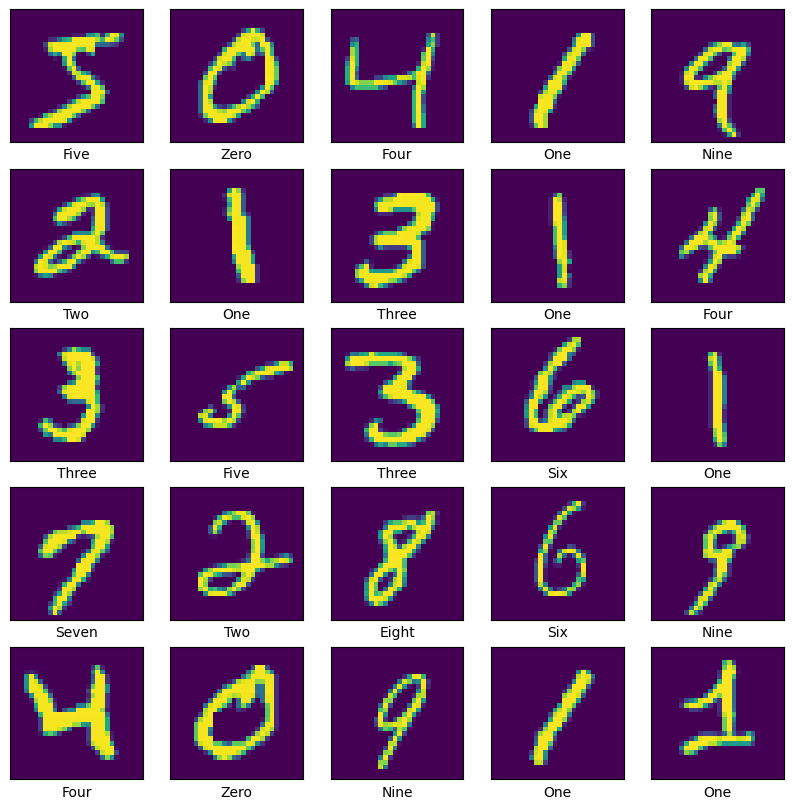

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i]])
plt.show()

**Step 4: Model selection and training**

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))  # Aquí modificamos el input_shape
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 55744 (217.75 KB)
Trainable params: 5574

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

**Step 5: Model testing**

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 576)              

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 56s 29ms/step - loss: 0.1417 - accuracy: 0.9568 - val_loss: 0.0490 - val_accuracy: 0.9853
Epoch 2/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0449 - accuracy: 0.9860 - val_loss: 0.0342 - val_accuracy: 0.9882
Epoch 3/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0325 - accuracy: 0.9896 - val_loss: 0.0326 - val_accuracy: 0.9905
Epoch 4/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0245 - accuracy: 0.9923 - val_loss: 0.0309 - val_accuracy: 0.9897
Epoch 5/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0193 - accuracy: 0.9938 - val_loss: 0.0341 - val_accuracy: 0.9899
Epoch 6/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0159 - accuracy: 0.9948 - val_loss: 0.0374 - val_accuracy: 0.9892
Epoch 7/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0126 - accuracy: 0.9958 - val_loss: 0.0424 -

313/313 - 2s - loss: 0.0369 - accuracy: 0.9905 - 2s/epoch - 7ms/step


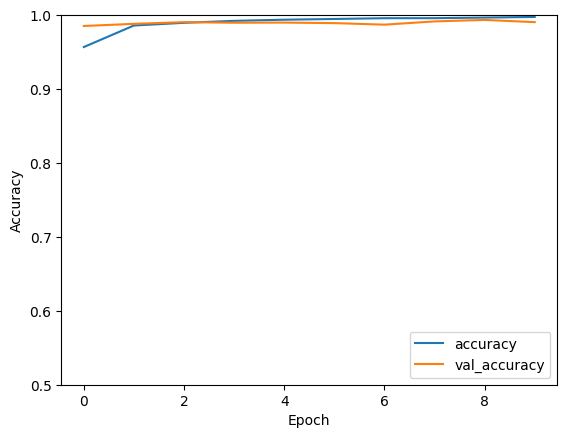

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
print(test_acc)

0.9904999732971191
